# **DATA 311 UBCO, KNN Regression implemented in Python**

## **Assignment 1, KNN Regression:**

### **Single Linear Regression:**

In [146]:
##decleration & data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('possum.csv')
df.head(10)

,rownames,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,C3,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,C5,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,C10,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,C15,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,C23,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,C24,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,C26,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,C27,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,C28,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,C31,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [ ]:
df.describe()

In [ ]:
df = df.dropna()

df.describe()

### **First we split the data into a training & testing set again:**

In [83]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.6*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['rownames', 'case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw',
       'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [95]:
train = training_data   .drop(columns=['rownames', 'Pop', 'sex'])
train.columns

test = testing_data     .drop(columns=['rownames', 'Pop', 'sex'])
test.columns

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

### **Now we can implement our first KNN regression on the dataset:**

    you use KNeighborsRegressor(n_neighbors=k) to initialize a KNNR object

    then you use .fit(x, y) to use the parameters (x, in this case all parameters) it can use to predict y

In [106]:
k = 2
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train, training_data['totlngth'])
predictions = knn.predict(test)

In [107]:
# predictionsDF = pd.DataFrame({'Predicted totlngth': predictions, 'Actual totlngth': test['totlngth']})

outDF = pd.DataFrame(test)

outDF['Predicted Totlngth'] = predictions
outDF['Actual Totlngth'] = outDF['totlngth']

outDF.drop(columns=['totlngth'])

outDF = outDF[['Predicted Totlngth', 'Actual Totlngth'] + list(outDF.columns[:-1])]

outDF.head(10)

,Predicted Totlngth,Actual Totlngth,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Predicted Totlngth
5,90.00,90.5,6,1,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0,90.00
25,90.75,90.0,26,1,7.0,96.0,59.0,90.0,36.0,73.6,56.2,15.0,29.0,38.0,90.75
49,88.50,88.0,50,3,5.0,91.6,56.4,88.0,38.0,65.0,47.2,14.9,28.0,36.0,88.50
71,81.25,80.5,72,5,1.0,85.9,52.4,80.5,35.0,62.0,42.4,14.1,25.5,30.0,81.25
78,81.00,81.0,79,6,1.0,85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5,81.00
81,84.25,82.0,82,6,4.0,86.0,54.0,82.0,36.5,60.7,42.9,15.4,26.0,32.0,84.25
96,87.25,86.0,97,7,3.0,91.0,53.1,86.0,38.0,63.8,46.0,14.5,25.0,31.5,87.25
31,92.75,94.0,32,1,4.0,94.3,56.7,94.0,39.0,74.8,52.0,14.9,28.0,34.0,92.75
54,94.25,92.5,55,4,2.0,103.1,63.2,92.5,38.0,72.5,44.9,16.4,30.5,36.0,94.25
23,85.50,84.0,24,1,2.0,94.4,54.9,84.0,34.0,75.0,53.5,16.2,27.0,32.0,85.50


### **And the final step is to find the MSE:**

In [108]:
predictions = pd.DataFrame({'Predicted totlngth': knn.predict(test), 'Actual totlngth': test['totlngth']})

me  =  (predictions['Actual totlngth'] - predictions['Predicted totlngth']).mean()
mse = ((predictions['Actual totlngth'] - predictions['Predicted totlngth']) ** 2).mean()

print("Average Error: ", me, "\t Mean Squared Error: ", mse)

Average Error:  -0.11624999999999978 	 Mean Squared Error:  1.6386875000000003


### **Now just for practice lets plot the MSE for each K:**

In [320]:
Karr = []; MEarr = []; MSEarr = []

FullData = {'K value': Karr, 'Average Error': MEarr, 'Mean Squared Error': MSEarr}; FullDf = pd.DataFrame(FullData)

In [321]:
k = 2
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train, training_data['totlngth'])
predictions = knn.predict(test)
predictions = pd.DataFrame({'Predicted totlngth': knn.predict(test), 'Actual totlngth': test['totlngth']})
me  =  (predictions['Actual totlngth'] - predictions['Predicted totlngth']).mean()
mse = ((predictions['Actual totlngth'] - predictions['Predicted totlngth']) ** 2).mean()
print("Average Error: ", me, "\t Mean Squared Error: ", mse)

Karr.append(k); MEarr.append(me); MSEarr.append(mse)

Average Error:  -0.11624999999999978 	 Mean Squared Error:  1.6386875000000003


run the above 2 once to restart, & run the below for eack k (10 times for k=10 for example)

In [381]:
k = k + 1
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train, training_data['totlngth'])
predictions = knn.predict(test)
predictions = pd.DataFrame({'Predicted totlngth': knn.predict(test), 'Actual totlngth': test['totlngth']})
me  =  (predictions['Actual totlngth'] - predictions['Predicted totlngth']).mean()
mse = ((predictions['Actual totlngth'] - predictions['Predicted totlngth']) ** 2).mean()
print("K: ", k, "\t Average Error: ", me, "\t Mean Squared Error: ", mse)

Karr.append(k); MEarr.append(me); MSEarr.append(mse)

K:  61 	 Average Error:  -0.183114754098359 	 Mean Squared Error:  17.946631013168503


do keep in mind due to the number of samples we cant exceed k=61

### **Now for fun lets plot it:**

<Axes: xlabel='Number of Nearest Neighbors', ylabel=' '>

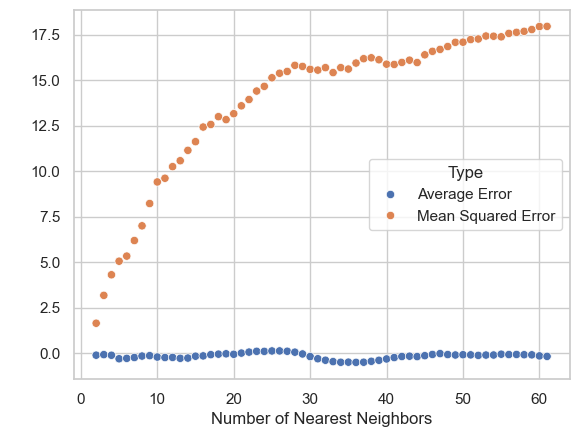

In [382]:
sns.set_theme(style="whitegrid")

data = {'Number of Nearest Neighbors': Karr, ' ': MEarr, "Type": 'Average Error'}; df1 = pd.DataFrame(data)

data = {'Number of Nearest Neighbors': Karr, ' ': MSEarr, "Type": 'Mean Squared Error'}; df2 = pd.DataFrame(data)

df0 = pd.concat([df1, df2])

sns.scatterplot(data=df0, x='Number of Nearest Neighbors', y=' ', hue='Type')

### **Next Notebooks: KNN classification && Linear & Quadratic Regression Analysis**